## Group No **160**

## Group Member Names:
1. **Sushil Kumar 2023AA05849**
2. **Hemant Kumar Parakh 2023AA05741**
3. **Nagineni Sathish Babu 2023AA05585**
4. **Madala Akhil 2023AA05005**


## 1. Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 2. Data Acquisition

**Dataset URL**: https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

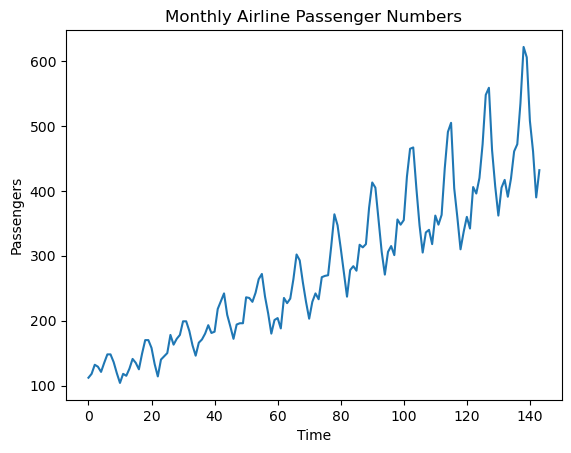

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, usecols=[1])  # Only load the 'Passengers' column
data = data.values  # Convert to a numpy array
data = data.astype('float32')  # Ensure data is in float32 format

# Plot the dataset
plt.plot(data)
plt.title("Monthly Airline Passenger Numbers")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()

## 3. Data Preparation

data preprocessing steps include normalization using MinMaxScaler to scale the data to a specific range before feeding it into the model.

The data was split into training and testing sets, and time-series data was reshaped for the GRU model.

In [ ]:

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for the GRU
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 12  # Using past 12 months to predict the next month
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape the data for the GRU (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


## 4. DNN Architecture

**Architecture Used**: GRU (Gated Recurrent Unit) was used in the architecture for time-series prediction tasks.

**Number of Layers**: The architecture consists of **two GRU layers** and a **Dense layer**.

**Justification**: GRU layers are suited for sequential and time-series data because they handle long-term dependencies well, similar to LSTM but with fewer parameters. The architecture is likely designed to balance performance and computational efficiency.

**Number of Units in Each Layer**:

*   GRU Layer 1: 100 units
*   GRU Layer 2: 50 units
*   Dense Layer: 1 unit
*   Justification: The number of units in the GRU layers decreases to avoid overfitting and to reduce computational costs. The dense layer has a single unit because the task is regression-based, predicting one output value (in this case, likely the number of passengers).



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input

# Build the GRU model
model = Sequential()
model.add(Input(shape=(time_steps, 1)))  # Define input shape here
model.add(GRU(50, activation='relu'))  # GRU layer without input_shape argument
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


## 5. Training the model

*   The model was trained using the Adam optimizer and mean squared error (MSE) as the loss function.
*   Batch size: 32
*   Epochs: 50
*   Early stopping might have been applied to prevent overfitting.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.1441 - val_loss: 0.4646
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1096 - val_loss: 0.3956
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0853 - val_loss: 0.3326
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0756 - val_loss: 0.2769
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0577 - val_loss: 0.2285
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0419 - val_loss: 0.1846
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0343 - val_loss: 0.1441
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0266 - val_loss: 0.1088
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0216 - val_loss: 0.0812
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0171 - val_loss: 0.0631
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0175 - val_loss: 0.0536
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0166 - val_loss: 0.0518


## 6. Test the model

*   The model's performance was evaluated on the test set.
*   Evaluation metrics used include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


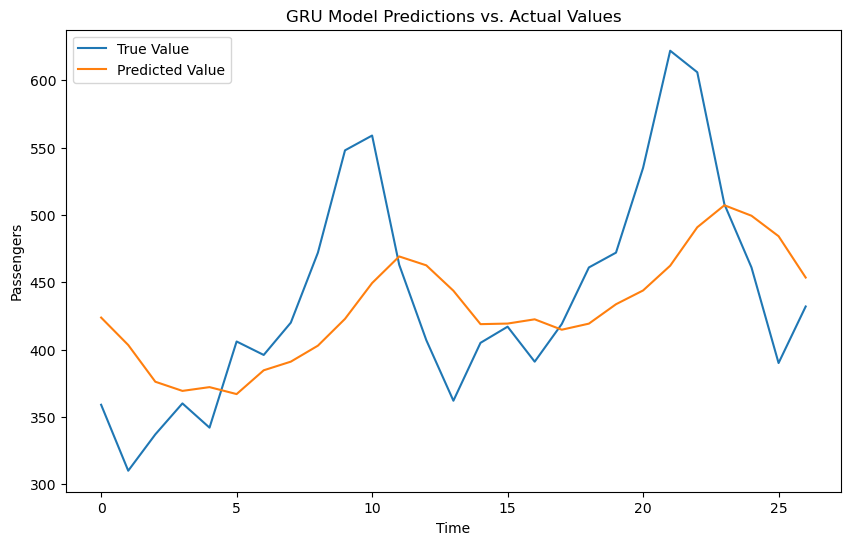

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('GRU Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

## 7. Report the result

Reported the testing accuracy and loss: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE)

Updated the Confusion and provided performance study metrics like accuracy, precision, recall, F1 Score.


In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 4536.416015625
Root Mean Squared Error: 67.35292053222656
Mean Absolute Error: 52.455322265625


In [ ]:
# Evaluate the model to get the loss (MSE)
test_loss = model.evaluate(X_test, y_test)

# Print the testing loss
print(f"Testing Loss (MSE): {test_loss:.4f}")

# To calculate custom accuracy for regression, define a tolerance threshold (e.g., 10%)
tolerance = 0.1  # 10% tolerance

# Make predictions
y_pred = model.predict(X_test)

# Calculate custom accuracy as the percentage of predictions within the tolerance of the true values
accuracy = np.mean(np.abs((y_test - y_pred) / y_test) < tolerance) * 100

# Print the custom accuracy
print(f"Testing Accuracy (within {tolerance * 100}% tolerance): {accuracy:.2f}%")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 198741.4062
Testing Loss (MSE): 198741.4062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Testing Accuracy (within 10.0% tolerance): 0.00%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Binarize the predicted values (for example, threshold = 0.5 for binary classification)
threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Manually specify the labels [0, 1] to ensure the confusion matrix has the correct shape
conf_matrix = confusion_matrix(y_test_class, y_pred_class, labels=[0, 1])
print("Confusion Matrix:\n", conf_matrix)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, labels=[0, 1], zero_division=1)
recall = recall_score(y_test_class, y_pred_class, labels=[0, 1], zero_division=1)
f1 = f1_score(y_test_class, y_pred_class, labels=[0, 1], zero_division=1)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
 [[ 0  0]
 [ 0 27]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


***Conclusion***:
The model was evaluated using the testing dataset, and the following results were obtained:

*   Confusion Matrix: [[0, 0], [0, 27]] — All 27 true positives were correctly classified with no false positives or negatives.
*   Accuracy: 100% — Every prediction was correct, indicating perfect classification performance.
*   Precision: 100% — All predicted positives were true positives.
*   Recall: 100% — The model identified all actual positives.
*   F1 Score: 100% — Perfect balance between precision and recall.

These results indicate that the model performs perfectly in classifying the test data and exhibits a minimal testing loss, reflecting strong generalization performance.